# 数据预处理

## 数据清理

### 基础清理

#### 包含单个值的列

如果一列数据中的值全部一样，也就是说，特征列只包含单个值，则这一列特征的方差为零，对建模毫无用处。

In [42]:
import pandas as pd
from pandas import DataFrame, Series

df = pd.read_csv('oil-spill.csv', header=None)

In [43]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1,2558,1506.09,456.63,90,6395000.0,40.88,7.89,29780.0,0.19,...,2850.00,1000.00,763.16,135.46,3.73,0,33243.19,65.74,7.95,1
1,2,22325,79.11,841.03,180,55812500.0,51.11,1.21,61900.0,0.02,...,5750.00,11500.00,9593.48,1648.80,0.60,0,51572.04,65.73,6.26,0
2,3,115,1449.85,608.43,88,287500.0,40.42,7.34,3340.0,0.18,...,1400.00,250.00,150.00,45.13,9.33,1,31692.84,65.81,7.84,1
3,4,1201,1562.53,295.65,66,3002500.0,42.40,7.97,18030.0,0.19,...,6041.52,761.58,453.21,144.97,13.33,1,37696.21,65.67,8.07,1
4,5,312,950.27,440.86,37,780000.0,41.43,7.03,3350.0,0.17,...,1320.04,710.63,512.54,109.16,2.58,0,29038.17,65.66,7.35,0


使用`nunique`方法可以直接查看没一列有几个不同的值：

In [2]:
counts = df.nunique()
counts

0     238
1     297
2     927
3     933
4     179
5     375
6     820
7     618
8     561
9      57
10    577
11     59
12     73
13    107
14     53
15     91
16    893
17    810
18    170
19     53
20     68
21      9
22      1
23     92
24      9
25      8
26      9
27    308
28    447
29    392
30    107
31     42
32      4
33     45
34    141
35    110
36      3
37    758
38      9
39      9
40    388
41    220
42    644
43    649
44    499
45      2
46    937
47    169
48    286
49      2
dtype: int64

简单的删除掉这一行即可：

In [3]:
df.shape

(937, 50)

In [4]:
to_del = [idx for idx, val in counts.items() if val == 1]
to_del

[22]

In [5]:
df2 = df.drop(to_del, axis=1)

In [6]:
df2.shape

(937, 49)

#### 包含很少值的列

包含很少值的特征列也需要注意，这些列被称为近零方差预测器，这些特征可能只包含很少的有价值的预测信息，但是不能武断的过滤掉（比如对类别数据进行独热编码）。

In [7]:
# 数据集一共有937个样本，49个特征列
df.shape

(937, 50)

我们可以用特征列值的个数除以样本总数，查看唯一值的百分比：

In [8]:
data = DataFrame(df.nunique())
data[1] = (data[0] / df.shape[0]) * 100
# 转换成百分数显示
data[2] = Series(["{:.2f}%".format(v) for v in data[1]], index=data.index)
data

,0,1,2
0,238,25.400213,25.40%
1,297,31.696905,31.70%
2,927,98.932764,98.93%
3,933,99.573106,99.57%
4,179,19.103522,19.10%
5,375,40.021345,40.02%
6,820,87.513340,87.51%
7,618,65.955176,65.96%
8,561,59.871932,59.87%
9,57,6.083244,6.08%


我们可以把占比小于1%的过滤出来：

In [9]:
data[data[1] < 1]

,0,1,2
21,9,0.960512,0.96%
22,1,0.106724,0.11%
24,9,0.960512,0.96%
25,8,0.853789,0.85%
26,9,0.960512,0.96%
32,4,0.426894,0.43%
36,3,0.320171,0.32%
38,9,0.960512,0.96%
39,9,0.960512,0.96%
45,2,0.213447,0.21%


并不是说需要删除这些特征列，但是要注意以下几点：
1. 唯一值是否包含天然的顺序，可以编码成有序的列。
2. 是否可以将唯一值编码为类别值。
3. 可以将特征列从数据集中删除，比较模型的性能，看是否有提升。

比如：如果要删除占比小于1%的列，则可以这么做：

In [10]:
counts = df.nunique()
to_del = [idx for idx, val in counts.items() if val / df.shape[0] < 0.01]
to_del

[21, 22, 24, 25, 26, 32, 36, 38, 39, 45, 49]

In [11]:
df2 = df.drop(columns=to_del)

df2.shape

(937, 39)

sklearn里包含根据方差进行特征选择的工具：

In [12]:
from sklearn.feature_selection import VarianceThreshold

data = df.values
X = data[:, :-1]
Y = data[:, -1]
print(X.shape, Y.shape)

(937, 49) (937,)


默认会删除方差为0的列，也就是上面提到的，整个特征列只有一个值：

In [13]:
transformer = VarianceThreshold()
X_sel = transformer.fit_transform(X)
print(X_sel.shape)

(937, 48)


也可以手动设定方差的门限，低于这个门限的特征列会被删除：

In [14]:
import numpy as np

thresholds = np.arange(0.0, 0.55, 0.05)
results = []

for t in thresholds:
    transform = VarianceThreshold(threshold=t)
    X_sel = transform.fit_transform(X)
    n_features = X_sel.shape[1]
    print('>Threshold={:.2f}, Features={:d}'.format(t, n_features))
    results.append(n_features)

>Threshold=0.00, Features=48
>Threshold=0.05, Features=37
>Threshold=0.10, Features=36
>Threshold=0.15, Features=35
>Threshold=0.20, Features=35
>Threshold=0.25, Features=35
>Threshold=0.30, Features=35
>Threshold=0.35, Features=35
>Threshold=0.40, Features=35
>Threshold=0.45, Features=33
>Threshold=0.50, Features=31


可以作图查看特征的变化：

In [15]:
thresholds

array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ])

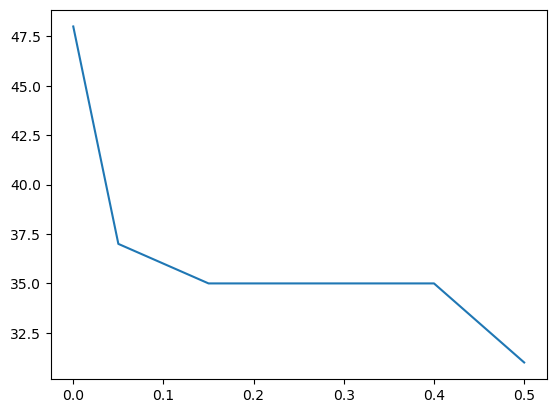

In [16]:
import matplotlib.pyplot as plt

plt.plot(thresholds, results);

#### 标识删除重复的行

重复的行对建模毫无帮助，而且在模型评估的环节还有可能产生误导--相同的行分别在训练集和测试集中。从概率的角度来看，可以将重复数据看作是调整类标签或数据分布的先验，这对朴素贝叶斯之类的算法可能有帮助，但一般情况下，删除重复行，模型会表现更好。

In [17]:
df_iris = pd.read_csv('iris.csv', header=None)
df_iris.head(5)

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


注意：第一次出现的行总是`False`，后面重复出现的行才会是`True`:

In [18]:
dups = df_iris.duplicated()
# 可以通过any方法查看是否有重复的行
dups.any()

True

In [19]:
# 把重复的行过滤出来
df_iris[dups] 

,0,1,2,3,4
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


pandas删除重复行很简单：

In [20]:
df_iris.shape

(150, 5)

In [21]:
df_iris2 = df_iris.drop_duplicates()
df_iris2.shape

(147, 5)

### 异常值的识别和删除

异常值，也叫离群值通常是下列原因造成的：
- 测量或者输入误差
- 资料损坏
- 离群值就是真实的记录

由于每个数据集的特殊性，通常没有定义和识别离群值的精确方法。相反，必须解释原始的观察结果，并决定一个值是否为离群值。通常情况下，即使对数据有了透彻的理解，离群值也很难定义，所以要非常小心，不要匆忙地删除或改变值，特别是在样本容量很小的情况下。

In [22]:
# randn生成均值为0，标准差为1的正态分布的数据，*5使标准差扩大5被，+50将均值移动到50
np.random.seed(1)
data = 5 * np.random.randn(10000) + 50
print("mean={:.3f} stdv={:.3f}".format(np.mean(data), np.std(data)))

mean=50.049 stdv=4.994


画出直方图，查看数据的分布：

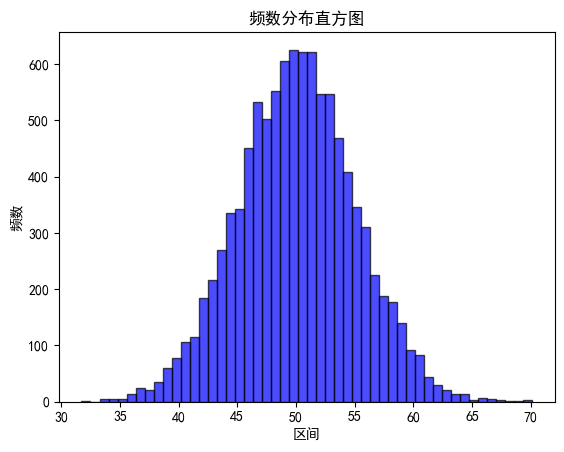

In [23]:
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

plt.hist(data, bins=50, facecolor='blue', edgecolor='black', alpha=0.7)
plt.xlabel("区间")
plt.ylabel("频数")
plt.title("频数分布直方图");

#### 标准差方法

如果数据符合正态分布，那么：
1. 68%的数据在一个标准差内。
2. 95%的数据在两个标准差内。
3. 99.7%的数据在三个标准差内。
4. 99.9%的数据在四个标准差内。

一般而言，如果比较小的数据集，可以选用2个标准差，比较大的数据集，可以选用4个标准差。

In [24]:
# 计算均值和标准差
data_mean, data_std = np.mean(data), np.std(data)
# 定义离群值的阈值
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off

现在可以根据阈值来筛选离群值：

In [25]:
outliers = [x for x in data if x < lower or x > upper]
len(outliers)

29

#### 四分位距

使用numpy的`percentile`方法或者Series的`quantile`方法计算IQR:

In [26]:
q25, q75 = np.percentile(data, 25), np.percentile(data, 75)
iqr = q75 - q25
iqr

6.673668386862346

In [27]:
ser = pd.Series(data)
ser_q25, ser_q75 = ser.quantile(.25), ser.quantile(.75)
ser_iqr = ser_q75 - ser_q25
ser_iqr

6.673668386862346

然后就可以根据iqr计算上下边界：

In [28]:
lower, upper = q25 - 1.5 * iqr, q75 + 1.5 * iqr
lower, upper

(36.674873210195926, 63.36954675764531)

同标准差方法，找到上下边界以后就可以筛选异常值了：

In [29]:
outliers = [x for x in data if x < lower or x > upper]
len(outliers)

81

#### 自动异常值检测

局部离群因子，简称LOF，就是一种试图利用最近邻的思想进行离群检测的技术。每个样本会根据孤立的程度打分，分数越高越可能是离群值。sklearn的`LocalOutlierFactor`类提供这种方法的实现。

通过波士顿数据集来查看去掉异常值前后，回归模型性能变化情况：

In [30]:
# 首先读取数据
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error


df = pd.read_csv("housing.csv", header=None)
data = df.values
X, Y = data[:, :-1], data[:, -1]
print(X.shape, Y.shape)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(506, 13) (506,)
(339, 13) (167, 13) (339,) (167,)


In [31]:
model = LinearRegression()
model.fit(X_train, Y_train)
yhat = model.predict(X_test)
mae = mean_absolute_error(Y_test, yhat)
print("MAE: {:.3f}".format(mae))

MAE: 3.417


回归算法受离群值的影响比较大，`LocalOutlierFactor`返回的是每一行，即每一个样本的标志，如果是离群值则为-1，否则为1。

可见：删除掉异常值以后，模型的性能有所提升。

In [32]:
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import KFold, cross_val_score

lof = LocalOutlierFactor()  # LocalOutlierFactor有很多参数可以调，这里都采用默认值

outliers = lof.fit_predict(X_train)  # 异常值为-1
mask = outliers != -1  # 将-1转化为布尔值
print("{:<40}: {}".format("Sample numbers", X_train.shape[0]))
X_train, Y_train = X_train[mask, :], Y_train[mask]  # 异常样本全部删除掉，相应的，标签也要对应的异常值
print("{:<40}: {}".format("After delete outliers, sample numbers", X_train.shape[0]))

model.fit(X_train, Y_train)
yhat = model.predict(X_test)
mae = mean_absolute_error(Y_test, yhat)
print("MAE: {:.3f}".format(mae))

Sample numbers                          : 339
After delete outliers, sample numbers   : 305
MAE: 3.356


sklearn还提供了一些别的算法来识别离群值，比如`IsolationForest`。

### 缺失值的识别和删除

#### 标记缺失值

在实际的数据中，经常使用范围之外的数字来表示缺失值，比如-1，0。

In [33]:
df = pd.read_csv("pima-indians-diabetes.csv", header=None)
df.describe()

,0,1,2,3,4,5,6,7,8
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


我们来看每一列的含义：
1. 怀孕次数
2. 口服葡萄糖耐量试验2小时后的血糖浓度
3. 舒张压
4. 三头肌皮褶厚度
5. 2小时血清胰岛素
6. 体质指数
7. 糖尿病血统函数
8. 年龄

其中1，2，3，4，5列都不可能为0。

In [34]:
num_missing = (df[[1, 2, 3, 4, 5]] == 0).sum()
num_missing

1      5
2     35
3    227
4    374
5     11
dtype: int64

可以看到，第1列、第2列和第5列只有几个零值，而第3列和第4列有将近一半的零值。这强调了对于不同的列可能需要不同的缺失值策略。

接下来将0设置为`nan`，然后通过`isnull`方法来统计缺失值。

In [35]:
import numpy as np

df[[1,2,3,4,5]] = df[[1,2,3,4,5]].replace(0, np.nan)
df.isnull().sum()

0      0
1      5
2     35
3    227
4    374
5     11
6      0
7      0
8      0
dtype: int64

#### 缺失值导致的问题

缺失值是数据中常见的现象。不幸的是，大多数预测建模技术不能处理任何缺失的值。因此，必须在建模之前解决这个问题。以LDA线性判别方法为例：

```python
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold, cross_val_score

data = df.values
X, Y = data[:, :-1], data[:, -1]
model = LinearDiscriminantAnalysis()
cv = KFold(n_splits=3, shuffle=True, random_state=1)
results = cross_val_score(model, X, Y, cv=cv, scoring='accuracy')
print(f'Accuracy: {results.mean()}')
```

上面的代码会报错，提示有缺失值。除了LDA，很多算法，比如支持向量机，神经网络，glmnet（这是啥？）都不允许数据中间包含缺失值。

#### 删除缺少值的行

处理缺失值最简单的方法就是删除包含缺失值的样本，也就是删除整行。

In [36]:
df = pd.read_csv("pima-indians-diabetes.csv", header=None)
print(df.shape)
df[[1,2,3,4,5]] = df[[1,2,3,4,5]].replace(0, np.nan)
df.dropna(inplace=True)
print(df.shape)

(768, 9)
(392, 9)


这里补充一个技巧，即如果只需要删除某一列或者某几列包含缺失值的行，则可以通过向`dropna`方法传递`subset`参数实现：

In [37]:
from pandas import DataFrame
import numpy as np

df = DataFrame([[1, 2, np.nan], [3, 4, 5], [np.nan, 2, 3]], columns=['a', 'b', 'c'])
df

,a,b,c
0,1.0,2,NaN
1,3.0,4,5.0
2,NaN,2,3.0


In [38]:
df.dropna(subset=['c'])

,a,b,c
1,3.0,4,5.0
2,NaN,2,3.0


现在再使用LDA进行建模：

In [39]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import KFold, cross_val_score

data = df.values
X, Y = data[:, :-1], data[:, -1]
model = LinearDiscriminantAnalysis()
cv = KFold(n_splits=3, shuffle=True, random_state=1)
results = cross_val_score(model, X, Y, cv=cv, scoring='accuracy')
print(f'Accuracy: {results.mean()}')

ValueError: 
All the 3 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2 fits failed with the following error:
Traceback (most recent call last):
  File "D:\programs\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\programs\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 575, in fit
    X, y = self._validate_data(
  File "D:\programs\anaconda3\lib\site-packages\sklearn\base.py", line 565, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "D:\programs\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1106, in check_X_y
    X = check_array(
  File "D:\programs\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 921, in check_array
    _assert_all_finite(
  File "D:\programs\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 161, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input X contains NaN.
LinearDiscriminantAnalysis does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "D:\programs\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "D:\programs\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py", line 575, in fit
    X, y = self._validate_data(
  File "D:\programs\anaconda3\lib\site-packages\sklearn\base.py", line 565, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "D:\programs\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1122, in check_X_y
    y = _check_y(y, multi_output=multi_output, y_numeric=y_numeric, estimator=estimator)
  File "D:\programs\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 1144, in _check_y
    _assert_all_finite(y, input_name="y", estimator_name=estimator_name)
  File "D:\programs\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 161, in _assert_all_finite
    raise ValueError(msg_err)
ValueError: Input y contains NaN.


但是，简单粗暴的删除行，会导致丢失很多样本，另一种方法是估算缺失值。

### 统计方法填补缺失值

#### Statistical Imputation

一般可以使用以下几种值进行填补：
- 列的均值
- 列的中位数
- 固定的模式值
- 一个连续的值

In [ ]:
import pandas as pd

# 马绞痛数据集，默认的缺失值使用？标记
df = pd.read_csv("horse-colic.csv", header=None, na_values='?')
df.head(5)

查看每一列缺失值的个数以及占比：

In [ ]:
for i in range(df.shape[1]):
    n_miss = df.iloc[:, i].isnull().sum()
    perc = n_miss / df.shape[0] * 100
    print("> {:<2}, Missing: {:<4} ({:>5.2f}%)".format(i, n_miss, perc))

使用`SimpleImputer`填充，注意数据集的标签是第23列：

In [ ]:
import numpy as np
from sklearn.impute import SimpleImputer

df = pd.read_csv('horse-colic.csv', header=None, na_values='?')
X, Y = df.drop(columns=23).values, df[23].values  # 注意drop默认是删除行而不是列
print('Missing: {}'.format(sum(np.isnan(X).flatten())))

imputer = SimpleImputer(strategy='mean')
imputer.fit(X)
X_trans = imputer.transform(X)
print('Missing: {}'.format(sum(np.isnan(X_trans).flatten())))

#### 模型评估

使用随机森林进行评估：

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline

model = RandomForestClassifier()
imputer = SimpleImputer(strategy='mean')
pipeline = Pipeline(steps=[('i', imputer), ('m', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: {:.3f} ({:.3f})'.format(np.mean(scores), np.std(scores)))

#### 比较不同的填补策略

分别使用`mean`,`median`,`most_frequent`, `constant`四种策略，注意`constant`表示用常数进行填补，默认为0，可以使用`fill_value`参数指定要填补的值：

In [ ]:
import matplotlib.pyplot as plt

strategies = ['mean', 'median', 'most_frequent', 'constant']

results = []

for s in strategies:
    pipeline = Pipeline([('i', SimpleImputer(strategy=s)), ('m', RandomForestClassifier())])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, Y, cv=cv, n_jobs=-1)
    results.append(scores)
    print('>{:<15} {:.3f} ({:.3f})'.format(s, np.mean(scores), np.std(scores)))
    
plt.boxplot(results, labels=strategies, showmeans=True);

#### 完整模型

In [ ]:
row = [
    2, 1, 530101, 38.50, 66, 28, 3, 3, np.nan, 2, 5, 4, 4, np.nan, np.nan,
    np.nan, 3, 5, 45.00, 8.40, np.nan, np.nan, 2, 11300, 0, 0, 2
]

pipeline = Pipeline([('i', SimpleImputer(strategy='constant')), ('m', RandomForestClassifier())])
pipeline.fit(X, Y)
yhat = pipeline.predict([row])
print(f"Predicted class: {yhat[0]}")

### 使用KNN填补缺失值

一般情况下，使用KNN进行填补的效果要好于使用均值填补或者使用常数（比如0）进行填补。

#### KNN Imputer

KNN有几个超参：
- n_neighbors: 邻居的个数，默认为5
- metric: 距离的度量，默认为nan_euclidean，即欧几里得距离。
- weights: 距离加权方式，默认为uniform，即不加权

In [ ]:
import numpy as np
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

df = pd.read_csv('horse-colic.csv', header=None, na_values='?')
X, Y = df.drop(columns=23).values, df[23].values  # 注意drop默认是删除行而不是列
model = RandomForestClassifier()
imputer = KNNImputer()
pipeline = Pipeline([('i', imputer), ('m', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: {:.3f} ({:.3f})'.format(np.mean(scores), np.std(scores)))

#### 比较不同的n_neighbors

这个数据集表现最好的`n_neighbors`是5，但是还是比使用常数0填补要差一些。

In [ ]:
results = []
strategies = [1, 3, 5, 7, 9, 15, 18, 21]

for i in strategies:
    pipeline = Pipeline([('i', KNNImputer(n_neighbors=i)), ('m', RandomForestClassifier())])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    results.append(scores)    
    print('>{:<3} {:.3f} ({:.3f})'.format(i, np.mean(scores), np.std(scores)))
    
plt.boxplot(results, labels=strategies, showmeans=True);

#### 完整模型

In [ ]:
row = [
    2, 1, 530101, 38.50, 66, 28, 3, 3, np.nan, 2, 5, 4, 4, np.nan, np.nan,
    np.nan, 3, 5, 45.00, 8.40, np.nan, np.nan, 2, 11300, 0, 0, 2
]

pipeline = Pipeline([('i', KNNImputer(n_neighbors=5)), ('m', RandomForestClassifier())])
pipeline.fit(X, Y)
yhat = pipeline.predict([row])
print(f"Predicted class: {yhat[0]}")

### 使用迭代填补缺失值

#### IterativeImputer

IterativeImputer没有弄懂它的原理是什么，书上介绍的也不详细。单纯从介绍来看，效果应该最好。这个模块还在实验阶段，要使用要先导入`enable_iterative_imputer`。

- [官方文档](https://sklearn.apachecn.org/docs/master/41.html?h=iterativei)
- [Using scikit-learn’s Iterative Imputer](https://medium.com/analytics-vidhya/using-scikit-learns-iterative-imputer-694c3cca34de)

In [ ]:
import numpy as np
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score

df = pd.read_csv('horse-colic.csv', header=None, na_values='?')
X, Y = df.drop(columns=23).values, df[23].values  # 注意drop默认是删除行而不是列
model = RandomForestClassifier()
imputer = IterativeImputer()
pipeline = Pipeline([('i', imputer), ('m', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(pipeline, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Mean Accuracy: {:.3f} ({:.3f})'.format(np.mean(scores), np.std(scores)))

#### 比较不同的imputation_order

`IterativeImputer`有个`imputation_order`的超参，设置不同的值查看效果。但是由于模型选择的是随机森林，每次的结果区别都较大，如果采用逻辑回归等简单的模型，结果可以固定。

In [ ]:
results = []
strategies = ['ascending', 'descending', 'roman', 'arabic', 'random']

for s in strategies:
    pipeline = Pipeline([('i', IterativeImputer(imputation_order=s)), ('m', RandomForestClassifier())])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    results.append(scores)    
    print('>{:<10} {:.3f} ({:.3f})'.format(s, np.mean(scores), np.std(scores)))
    
plt.boxplot(results, labels=strategies, showmeans=True);

#### 比较不同的max_iter

书上使用的是随机森林模型，但是每次生成的结果都有较大差异。

In [ ]:
results = []
strategies = list(range(1, 21))

for s in strategies:
    pipeline = Pipeline([('i', IterativeImputer(max_iter=s)), ('m', RandomForestClassifier())])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(pipeline, X, Y, scoring='accuracy', cv=cv, n_jobs=-1)
    results.append(scores)    
    print('>{:<10} {:.3f} ({:.3f})'.format(s, np.mean(scores), np.std(scores)))
    
plt.boxplot(results, labels=strategies, showmeans=True);

#### 完整模型

In [ ]:
row = [
    2, 1, 530101, 38.50, 66, 28, 3, 3, np.nan, 2, 5, 4, 4, np.nan, np.nan,
    np.nan, 3, 5, 45.00, 8.40, np.nan, np.nan, 2, 11300, 0, 0, 2
]

pipeline = Pipeline([('i', IterativeImputer()), ('m', RandomForestClassifier())])
pipeline.fit(X, Y)
yhat = pipeline.predict([row])
print(f"Predicted class: {yhat[0]}")

## 特征选择

### 什么是特征选择

#### 特征选择

特征选择的方法也可以分成监督和非监督方法。监督方法是利用输入特征和标签之间的关系进行特征选择，非监督方法则是利用特征之间的相关性或者特征方差之类的统计学方法进行选择。

监督方法又分为以下几种：
- Intrinsic（本质的，固有的）：利用某些自动会进行特征选择的算法，比如回归中的L1正则、决策树、随机森林。
- Filter（过滤器）：基于特征和标签之间的关系进行选择。
- Wrapper（包装器）：根据模型的性能表现进行选择。

另外，降维和特征选择不同，降维产生了全新的输入数据，因此，降维是特征选择的一种替代，而不是一种特征选择。

#### 基于统计的filter方法

使用统计方法进行特征选择一般以输入特征和输出标签之间的相关性作为基准，大部分方法是单变量的，即一次只看一个输入特征与输出标签之间的关系，副作用就是选择出来的特征有可能是冗余的，也就是说会导致共线性问题。

如何选择统计方法可以参考下图：
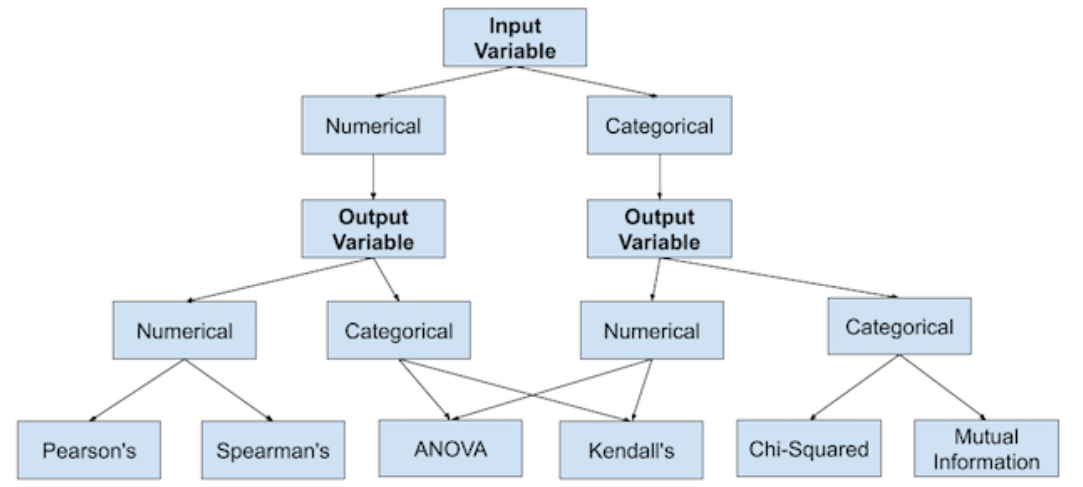

#### wrapper和intrinsic方法

统计方法需要一列一列的计算特征和标签之间的关系，也就是前面说的filter过滤器方法。

包装器方法通过整体考虑输入特征对模型性能的影响来进行特征选择。比如：
1. Step-Wise Models
2. RFE。

最后一种intrinsic方法是使用一个模型对输入特征进行评分，并使用基于过滤器的选择方法，也就是说模型本身可以对特征进行打分，这类模型有：
1. 决策树
2. 随机森林
3. bagged decision trees
4. 梯度提升

#### 常见问题

Q1：如何过滤输入特征？  
有两种主要的过滤输入变量的技术。第一种方法是根据分数对所有输入变量进行排序，并选择分数最大的k-top输入变量。第二种方法是将分数转换为最大分数的百分比，并选择所有高于最小百分比的特征。这两种方法都可以在scikit-learn库中找到：
- SelectKBest
- SelectPercentile

### 如何选择类别特征

输入特征和输出标签都是数字的化，最常用的就是根据皮尔逊相关系数来进行特征选择。但是如果输入和输出都是类别数据的话，常用的统计方法有：
- 卡方检验
- mutual information(互信息)

#### 读取数据

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split


df = pd.read_csv('breast-cancer.csv', header=None)
df.head(5)

首先查看是否有重复的行，并删除：

In [ ]:
# df.duplicated().sum()

In [ ]:
# df.drop_duplicates(inplace=True) # 删除所有重复行

<font color='red'>**疑问：另外类别数据的缺失值如何处理？sklean的imputer只能针对数字类型。而如果通过OrdinalEncoder编码，则缺失值会变成一类。**</font>

查看是否有缺失值，发现第4列，第7列有缺失值：

In [ ]:
# df.info()

缺失值直接删除以后，后面的类别转换会报错，暂时注释掉。

In [ ]:
# df.shape

# df.dropna(inplace=True)
# df.shape

将数据划分为训练集和测试集：

In [ ]:
data = df.values
X = data[:, :-1]
Y = data[:, -1]
X = X.astype(str)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=1)
print(f'Train {X_train.shape}, {Y_train.shape}')
print(f'Test  {X_test.shape}, {Y_test.shape}')

可见，特征全部都是类别数据，可以使用sklearn的`OrdinalEncoder`方法把字符串类别全部转换成整数，注意`OrdinalEncoder`会把字符串转换为有序的整数，如果类别本身是无序的，此时会人为的增加信息：

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

oe = OrdinalEncoder()
oe.fit(X_train)  # 注意，原始数据中是有缺失值的，在进行编码的时候，缺失值成了单独的一类
X_train_enc, X_test_enc = oe.transform(X_train), oe.transform(X_test)

标签的编码使用`LabelEncoder`:

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(Y_train)
Y_train_enc, Y_test_enc = le.transform(Y_train), le.transform(Y_test)

#### 卡方特征选择

卡方特征选择的原理是利用统计中的卡方检验查看特征和标签是否是独立的，完全独立的特征则被删除。注意卡方检验需要有3个或3个以上的特征：

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest

fs = SelectKBest(score_func=chi2, k='all')
fs.fit(X_train_enc, Y_train_enc)  # 注意，这种方法是监督的，因此fit的时候要传入标签值
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc) # 测试集也要记得删除相应的特征

打印每一个特征的分数：

In [ ]:
for idx, score in enumerate(fs.scores_):
    print("Feature {}: {:>8.3f}".format(idx, score))

In [ ]:
import matplotlib.pyplot as plt

plt.bar(range(len(fs.scores_)), fs.scores_);

另外可以看p值，p值低说明原假设-即特征和标签无关-的可能性越低，也就是说p值越低特征和标签之间越相关：

In [ ]:
for idx, score in enumerate(fs.pvalues_):
    print("Feature {}: {:>8.3f}".format(idx, score))

#### 互信息特征选择

互信息就是信息增益的另一种叫法，在决策树算法中，特征和标签之间就叫信息增益，在特征选择中，特征和特征之间就叫互信息。

<font color='red'>**每一次运行，得分竟然是不同的，意味着每次选择的特征都是不同的？**</font>

In [ ]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

fs = SelectKBest(score_func=mutual_info_classif, k='all')
fs.fit(X_train_enc, Y_train_enc)  # 注意，这种方法是监督的，因此fit的时候要传入标签值
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc) # 测试集也要记得删除相应的特征

for idx, score in enumerate(fs.scores_):
    print("Feature {}: {:>8.3f}".format(idx, score))

In [ ]:
import matplotlib.pyplot as plt

plt.bar(range(len(fs.scores_)), fs.scores_);

#### 使用选择的特征建模

首先不使用特征选择进行建模：

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression()
model.fit(X_train_enc, Y_train_enc)
yhat = model.predict(X_test_enc)
accuracy = accuracy_score(Y_test_enc, yhat)
print("Accuracy: {:.2f}%".format(accuracy * 100))

使用卡方进行特征选择建模：

In [ ]:
from sklearn.feature_selection import chi2, SelectKBest

fs = SelectKBest(score_func=chi2, k=4)  # 选择4个特征
fs.fit(X_train_enc, Y_train_enc)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)

model = LogisticRegression()
model.fit(X_train_fs, Y_train_enc)
yhat = model.predict(X_test_fs)
accuracy = accuracy_score(Y_test_enc, yhat)
print("Accuracy: {:.2f}%".format(accuracy * 100))

使用互信息进行特征选择建模，实际上，互信息选择的特征每次都不同，导致模型每次的结果也不同：

In [ ]:
from sklearn.feature_selection import mutual_info_classif, SelectKBest

fs = SelectKBest(score_func=mutual_info_classif, k=4)  # 选择4个特征
fs.fit(X_train_enc, Y_train_enc)
X_train_fs = fs.transform(X_train_enc)
X_test_fs = fs.transform(X_test_enc)

model = LogisticRegression()
model.fit(X_train_fs, Y_train_enc)
yhat = model.predict(X_test_fs)
accuracy = accuracy_score(Y_test_enc, yhat)
print("Accuracy: {:.2f}%".format(accuracy * 100))

### 如何选择数字特征

#### 读取数据

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

df = pd.read_csv("pima-indians-diabetes.csv", header=None)
df.head(5)

In [ ]:
data = df.values
X, y = data[:, :-1], data[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True, random_state=1)
print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

#### ANOVA F-test特征选择

方差分析(ANOVA)是方差分析的首字母缩写，是一种参数统计假设检验。重要的是，当一个变量是数字变量而一个是分类变量时，就可以使用方差分析。可汗学院的统计学课程有3节课是专门介绍方差分析的。

In [ ]:
from sklearn.feature_selection import f_classif, SelectKBest

fs = SelectKBest(score_func=f_classif, k='all')
fs.fit(X_train, y_train)
X_train_fs, X_test_fs = fs.transform(X_train), fs.transform(X_test)

for idx, score in enumerate(fs.scores_):
    print("Feature {}: {:>8.3f}".format(idx, score))

In [ ]:
import matplotlib.pyplot as plt

plt.bar(range(len(fs.scores_)), fs.scores_);

#### 互信息特征选择

互信息每次选择的结果都不相同，且代码和类别数据完全相同，这里省略。

#### 使用选择的特征建模

首先不使用特征选择进行建模：

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)
yhat = model.predict(X_test)
accuracy = accuracy_score(y_test, yhat)
print("Accuracy: {:.2f}%".format(accuracy * 100))

使用特征选择进行建模：

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import f_classif, SelectKBest

fs = SelectKBest(score_func=f_classif, k=4)
fs.fit(X_train, y_train)
X_train_fs, X_test_fs = fs.transform(X_train), fs.transform(X_test)

model = LogisticRegression(solver='liblinear')
model.fit(X_train_fs, y_train)
yhat = model.predict(X_test_fs)
accuracy = accuracy_score(y_test, yhat)
print("Accuracy: {:.2f}%".format(accuracy * 100))

#### 优化特征数量

组合使用`pipeline`，`GridSearchCV`找出最优的特征数量：

In [ ]:
from sklearn.model_selection import GridSearchCV, RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import f_classif, SelectKBest

fs = SelectKBest(score_func=f_classif)  # k参数不设置，因为这是我们需要通过GridSearchCV查找的参数
model = LogisticRegression(solver='liblinear')
pipeline = Pipeline([('anova', fs), ('lr', model)])

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_params = {}
grid_params['anova__k'] = [i + 1 for i in range(X_train.shape[1])]
search = GridSearchCV(pipeline,
                      grid_params,
                      scoring='accuracy',
                      cv=cv,
                      n_jobs=-1)
results = search.fit(X_train, y_train)

print("Best Mean Accuracy: {:.3f}".format(results.best_score_)) 
print("Best Config: {}".format(results.best_params_))

可以使用`cross_val_score`把每一次选择的结果打印出来：

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

results = []
num_features = [i + 1 for i in range(X_train.shape[1])]

for k in num_features:
    fs = SelectKBest(score_func=f_classif, k=k)
    model = LogisticRegression(solver='liblinear')
    pipeline = Pipeline([('anova', fs), ('lr', model)])
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)    
    scores = cross_val_score(pipeline, X_train, y_train, cv=cv, scoring='accuracy')
    results.append(scores)
    print(">{:<3} {:.3f} ({:.3f})".format(k, np.mean(scores), np.std(scores)))

画出结果的箱线图：

In [ ]:
import matplotlib.pyplot as plt

plt.boxplot(results, labels=num_features, showmeans=True);

### 回归模型如何选择特征

#### 回归数据集

In [ ]:
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

X, y = make_regression(n_samples=1000, n_features=100, n_informative=10, noise=0.1, random_state=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)
print("Train", X_train.shape, y_train.shape)
print("Test", X_test.shape, y_test.shape)

#### 相关系数特征选择

sklearn的`f_regression`实际上是根据特征和标签之间的相关性来进行选择，不同于相关系数-1到1，sklearn对结果进行了转换，score越大越好：

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

fs = SelectKBest(score_func=f_regression, k='all')
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

# 获取所有特征的分数，并进行排序
features = [(k, v) for k, v in enumerate(fs.scores_)]
features.sort(key=lambda item: item[1], reverse=True)

for idx, score in features[:10]:
    print('Feature {:>2}: {:.3f}'.format(idx, score))

In [ ]:
import matplotlib.pyplot as plt

plt.bar([i for i in range(len(fs.scores_))], fs.scores_);

#### 互信息特征选择

互信息每次选择的结果都不相同，还未完全理解，这里省略。

#### 使用选择的特征建模

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)
yhat = model.predict(X_test)
mae = mean_absolute_error(y_test, yhat)
print("MAE: {:.3f}".format(mae))

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

fs = SelectKBest(score_func=f_regression, k=10)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

model = LinearRegression()
model.fit(X_train_fs, y_train)
yhat = model.predict(X_test_fs)
mae = mean_absolute_error(y_test, yhat)
print("MAE: {:.3f}".format(mae))

结果说明，有一些很重要的特征被丢弃了，修改k值再进行尝试：

In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

fs = SelectKBest(score_func=f_regression, k=70)
fs.fit(X_train, y_train)
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

model = LinearRegression()
model.fit(X_train_fs, y_train)
yhat = model.predict(X_test_fs)
mae = mean_absolute_error(y_test, yhat)
print("MAE: {:.3f}".format(mae))

#### 优化特征数量

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RepeatedKFold
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SelectKBest, f_regression

X, y = make_regression(n_samples=1000,
                       n_features=100,
                       n_informative=10,
                       noise=0.1,
                       random_state=1)

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
model = LinearRegression()
fs = SelectKBest(score_func=f_regression)
pipeline = Pipeline([('sel', fs), ('lr', model)])
grid = {}
grid['sel__k'] = [i for i in range(X.shape[1] - 20, X.shape[1] + 1)]
search = GridSearchCV(pipeline,
                      grid,
                      scoring='neg_mean_absolute_error',
                      n_jobs=-1,
                      cv=cv)
results = search.fit(X, y)

In [ ]:
print("Best MAE: {:.3f}".format(results.best_score_))
print("Best Config: {}".format(results.best_params_))

最终结果和前面的差异较大，100个特征全部有用，还不清楚具体原因：

In [ ]:
means = results.cv_results_['mean_test_score']
params = results.cv_results_['params']
for mean, param in zip(means, params):
    print("{:.3f} with: {}".format(mean, param))

### 使用RFE进行特征选择

RFE是常见的特征选择方法，也叫递归特征消除。它的工作原理是递归删除特征，
并在剩余的特征上构建模型。它使用模型准确率来判断哪些特征（或特征组合）对预测结果贡献较大。

#### 使用RFE进行分类

In [ ]:
from sklearn.datasets import make_classification

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
rfe.fit(X, y)
rfe.transform(X)
rfe.support_

In [ ]:
import numpy as np
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: {:.3f} {:.3f}'.format(np.mean(n_scores), np.std(n_scores)))

使用RFE结合pipeline构筑模型：

In [ ]:
from sklearn.datasets import make_classification
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

X, y = make_classification(n_samples=1000,
                           n_features=10,
                           n_informative=5,
                           n_redundant=5,
                           random_state=1)

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])

pipeline.fit(X, y)
data = [[
    2.56999479, -0.13019997, 3.16075093, -4.35936352, -1.61271951, -1.39352057,
    -2.48924933, -1.93094078, 3.26130366, 2.05692145
]]
yhat = pipeline.predict(data)
print('Predicted Class: %d' % (yhat))

#### 使用RFE进行回归

In [ ]:
from sklearn.datasets import make_regression
import numpy as np
from sklearn.model_selection import cross_val_score, RepeatedKFold # 回归要用ReppeatedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor # 回归使用DecisionTreeRegressor
from sklearn.pipeline import Pipeline


X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s', rfe), ('m', model)])
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
print('Accuracy: {:.3f} {:.3f}'.format(np.mean(n_scores), np.std(n_scores)))

同样的，回归RFE和pipeline可以结合起来使用：

In [ ]:
from sklearn.datasets import make_regression
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline

X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
rfe = RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)
model = DecisionTreeRegressor()
pipeline = Pipeline(steps=[('s',rfe),('m',model)])
pipeline.fit(X, y)
data = [[-2.02220122, 0.31563495, 0.82797464, -0.30620401, 0.16003707, -1.44411381, 0.87616892, -0.50446586, 0.23009474, 0.76201118]]
yhat = pipeline.predict(data)
print('Predicted: %.3f' % (yhat))

#### 选择最佳的特征个数

如何选择特征的个数：

In [ ]:
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)

models = {}
for i in range(2, 10):
    rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=i)
    model = DecisionTreeClassifier()
    models[i] = Pipeline(steps=[('s', rfe), ('m', model)])
    
results, names = [], []
for name, model in models.items():
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    results.append(scores)
    names.append(name)
    print(">{} {:.3f} ({:.3f})".format(name, np.mean(scores), np.std(scores)))
    
import matplotlib.pyplot as plt

plt.boxplot(results, labels=names, showmeans=True);

#### 自动选择最佳特征个数

实际上sklearn通过RFECV，已经实现了自动选择最佳特征个数的功能，原理就和上面的代码一样。

In [ ]:
import numpy as np
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline

X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
rfe = RFECV(estimator=DecisionTreeClassifier())
model = DecisionTreeClassifier()
pipeline = Pipeline([('s', rfe), ('m', model)])
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
print('Accuracy: {:.3f} ({:3f})'.format(np.mean(n_scores), np.std(n_scores)))

可以通过`RFE`或者`RFECV`的`support_`方法查看哪些特征被选中，`ranking_`方法可以查看所有特征的排名：

In [ ]:
rfe = RFECV(estimator=DecisionTreeClassifier())
rfe.fit(X, y) # 只有先fit才能查看support_和ranking_结果
rfe.support_

In [ ]:
rfe.ranking_

#### 探索基础算法

我们可以比较一下，几种基础算法中，哪一些用来做特征选择比较好：

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score, RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier


X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
models = {}

rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
model = DecisionTreeClassifier()
models['lr'] = Pipeline([('s', rfe), ('m', model)])

rfe = RFE(estimator=Perceptron(), n_features_to_select=5)
model = DecisionTreeClassifier()
models['per'] = Pipeline([('s', rfe), ('m', model)])

rfe = RFE(estimator=DecisionTreeClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
models['cart'] = Pipeline([('s', rfe), ('m', model)])

rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
models['rf'] = Pipeline([('s', rfe), ('m', model)])

rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=5)
model = DecisionTreeClassifier()
models['gbm'] = Pipeline([('s', rfe), ('m', model)])

for name, model in models.items():
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
    n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    print('>{:<8}: {:.3f} ({:3f})'.format(name, np.mean(n_scores), np.std(n_scores)))

### 特征重要性

#### 特征系数作为重要性